In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

train_path='C:/Users/jmlee/Desktop/Jimin/data_study/CNN_fruit/dataset/train_set'
test_path='C:/Users/jmlee/Desktop/Jimin/data_study/CNN_fruit/dataset/test_set'

In [84]:
from PIL import Image
#훈련데이터 불러와서 resize하고 저장
X_train=[]
for f in os.listdir(train_path):
    if f.split('.')[1] =='jpg':
        img = cv2.imread(train_path+'/'+f)
        img = cv2.resize(img,(200,200))
        img=  cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#         cv2.imwrite(f,img)   #ipynb파일위치에 저장됨.
        X_train.append(img)

#라벨링
title=[]
train_label=[]
for i in os.listdir(train_path):
    if(i[0]=='a'):
        train_label.append(0)
    elif(i[0]=='b'):
        train_label.append(1)
    elif(i[0]=='o'):
        train_label.append(2)
    elif(i[0]=='m'):
        train_label.append(3)

In [85]:
#이미지를 array로
X_train=np.array(X_train)

In [86]:
#원-핫 인코딩
from keras.utils import np_utils
train_label= np_utils.to_categorical(train_label)

In [87]:
#훈련, 검증데이터 나누기
x_train, x_val, y_train, y_val=train_test_split(X_train, train_label, random_state=1)

In [ ]:
# label=np.array(train_label)
# type(train_label)

In [88]:
X_train.shape #첫번째 이미지 정보

(232, 200, 200, 3)

In [89]:
label.shape

(232, 4)

In [90]:
type(label)
type(X_train)

numpy.ndarray

In [91]:
from PIL import Image
#테스트데이터 불러와서 resize하고 저장
X_test=[]
for f in os.listdir(test_path):
    if f.split('.')[1] =='jpg':
        img = cv2.imread(test_path+'/'+f)
        img = cv2.resize(img,(200,200))
        img=  cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#         cv2.imwrite(f,img)   #ipynb파일위치에 저장됨.
        X_test.append(img)

#라벨링
title=[]
test_label=[]
for i in os.listdir(test_path):
    if(i[0]=='a'):
        test_label.append(0)
    elif(i[0]=='b'):
        test_label.append(1)
    elif(i[0]=='o'):
        test_label.append(2)
    elif(i[0]=='m'):
        test_label.append(3)

In [102]:
#배열로 바꾸기
X_test=np.array(X_test)
test_label=np.array(test_label)

In [93]:
#CNN
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier=Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'))
#필러 갯수, 필러 열, 필러 행, input이미지(x,y,채널),활성화함수

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(32,(2,2),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())
#2차원을 1차원으로

#완전 연결
classifier.add(Dense(units=128,activation='relu'))
#(activation,units)
#출력 가중치 차원, 활성화 함수

classifier.add(Dense(units=4,activation='softmax'))

#CNN 컴파일
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
classifier.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 98, 98, 32)        4128      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               9834624   
_________________________________________________________________
dense_30 (Dense)             (None, 4)               

In [95]:
#모델 훈련
history=classifier.fit(X_train,label,epochs=40,validation_data=(x_val, y_val))

Train on 232 samples, validate on 58 samples
Epoch 1/40
232/232 [==============================] - 8s 33ms/step - loss: 1780.3208 - accuracy: 0.2241 - val_loss: 230.0941 - val_accuracy: 0.4310
Epoch 2/40
232/232 [==============================] - 8s 36ms/step - loss: 152.8984 - accuracy: 0.6164 - val_loss: 120.3627 - val_accuracy: 0.5690
Epoch 3/40
232/232 [==============================] - 8s 33ms/step - loss: 64.1337 - accuracy: 0.7112 - val_loss: 16.9717 - val_accuracy: 0.7759
Epoch 4/40
232/232 [==============================] - 8s 34ms/step - loss: 13.7751 - accuracy: 0.7328 - val_loss: 2.8419 - val_accuracy: 0.8621
Epoch 5/40
232/232 [==============================] - 8s 33ms/step - loss: 1.6874 - accuracy: 0.8362 - val_loss: 0.5237 - val_accuracy: 0.9138
Epoch 6/40
232/232 [==============================] - 8s 37ms/step - loss: 0.4845 - accuracy: 0.8922 - val_loss: 0.2417 - val_accuracy: 0.9483
Epoch 7/40
232/232 [==============================] - 8s 35ms/step - loss: 0.4106 - a

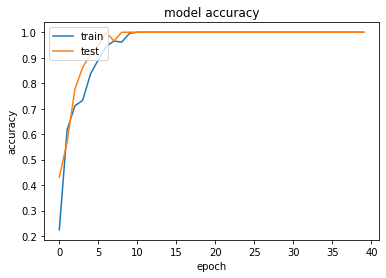

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

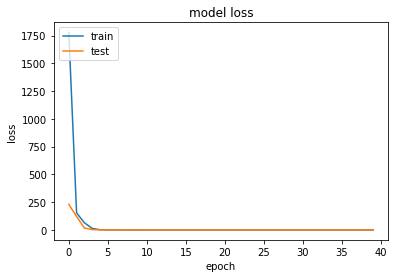

In [97]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
# Evaluating model on validation data
val_loss, val_acc = classifier.evaluate(x_val,y_val)
print("val_loss: "+str(val_loss))
print("val_acc: "+str(val_acc))

58/58 [==============================] - 1s 9ms/step
val_loss: 4.0016328308285725e-06
val_acc: 1.0


In [103]:
# Evaluating model on test data
print(type(X_test))
print(X_test.shape)
print(type(test_label))
print(test_label.shape)

<class 'numpy.ndarray'>
(60, 200, 200, 3)
<class 'numpy.ndarray'>
(60,)


In [105]:
print(test_label[0:1])

[0]


In [130]:
predict=classifier.predict(X_test)
predict_result=[]
predict_label=[]
output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

for i in range(len(X_test)):
    predict_result.append(output[np.argmax(predict[i])])

In [131]:
len(predict_result)
predict_result[59]

'mixed'

In [132]:
for i in range(len(predict_result)):
    if(predict_result[i]=='apple'):
        predict_label.append(0)
    elif(predict_result[i]=='banana'):
        predict_label.append(1)
    elif(predict_result[i]=='orange'):
        predict_label.append(2)
    elif(predict_result[i]=='mixed'):
        predict_label.append(3)

In [133]:
print(test_label)
print("\n")
print(predict_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 3, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3]


In [134]:
len(test_label)

60

In [135]:
len(predict_label)

60

In [136]:
print(np.mean(np.array(test_label)==np.array(predict_label)))

0.4666666666666667
